# Imports

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

BG_COLOR = "#f5f4f2"

params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [16, 9],
    'figure.edgecolor': BG_COLOR,
    'figure.facecolor': BG_COLOR,
    'axes.edgecolor': BG_COLOR,
    'axes.facecolor': BG_COLOR,
    'axes.grid': False,
   }

plt.rcParams.update(params)

DEFAULT_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

import pandas as pd
import numpy as np

import requests
import os

# SNSF open data: Who gets funding? How to calculate figures yourself – **with Python**

The Swiss National Science Foundation (SNSF) provides [comprehensive data sets](https://data.snf.ch/datasets) about their funding. In addition to their [elaborated and aesthetic data stories](https://data.snf.ch/stories) they published [a starter kit for R](https://data.snf.ch/stories/snsf-open-data-who-gets-funding-en.html), that shows how interested parties can analyze the open data in R. 

I rewrote the code in Python to simplify access for people that aren't familiar with R. For all details about the data and these first steps in EDA see [the original starter kit](https://data.snf.ch/stories/snsf-open-data-who-gets-funding-en.html).

## Load and prepare data

Download all funded grants since 1975

In [2]:
if not os.path.isfile('grants.csv'):
    data_url = "https://data.snf.ch/exportcsv/Grant.csv"
    res = requests.get(data_url)

    with open("grants.csv", "w") as file:
        file.write(res.text)

Load data into pandas dataframe

In [3]:
df = pd.read_csv("grants.csv", sep=";")

Quick look at the variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83619 entries, 0 to 83618
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AllDisciplines              83618 non-null  object 
 1   AmountGrantedAllSets        83619 non-null  float64
 2   CallDecisionYear            83619 non-null  int64  
 3   CallEndDate                 41871 non-null  object 
 4   CallFullTitle               41871 non-null  object 
 5   EffectiveGrantEndDate       83619 non-null  object 
 6   EffectiveGrantStartDate     83619 non-null  object 
 7   FundingInstrumentLevel1     83619 non-null  object 
 8   FundingInstrumentPublished  83619 non-null  object 
 9   FundingInstrumentReporting  83619 non-null  object 
 10  GrantNumber                 83619 non-null  int64  
 11  GrantNumberString           83619 non-null  object 
 12  Institute                   77455 non-null  object 
 13  InstituteCountry            771

Quick look at the values of the first rows

In [5]:
df.head(3).T

,0,1,2
AllDisciplines,30202,30202,30202
AmountGrantedAllSets,274800.0,840000.0,72058.0
CallDecisionYear,2003,2013,1990
CallEndDate,NaN,NaN,NaN
CallFullTitle,NaN,NaN,NaN
EffectiveGrantEndDate,2005-07-31T00:00:00Z,2016-05-31T00:00:00Z,1991-09-30T00:00:00Z
EffectiveGrantStartDate,2003-04-01T00:00:00Z,2013-06-01T00:00:00Z,1990-10-01T00:00:00Z
FundingInstrumentLevel1,Projects,Projects,Careers
FundingInstrumentPublished,Project funding,Project funding,Fellowships for advanced researchers
FundingInstrumentReporting,Project funding,Project funding,Fellowships


Filter data to years between 2011 and 2021

In [6]:
start_year = 2011
end_year = 2021
df = df[(df.CallDecisionYear>=start_year) & (df.CallDecisionYear<=end_year)]
print(f"{df.shape[0]:,.0f} grants were approved between {(start_year)} and {end_year}.")

32,055 grants were approved between 2011 and 2021.


## Plot: Total grants per years

In [7]:
total_granted = df.groupby("CallDecisionYear").AmountGrantedAllSets.sum() / 1_000_000

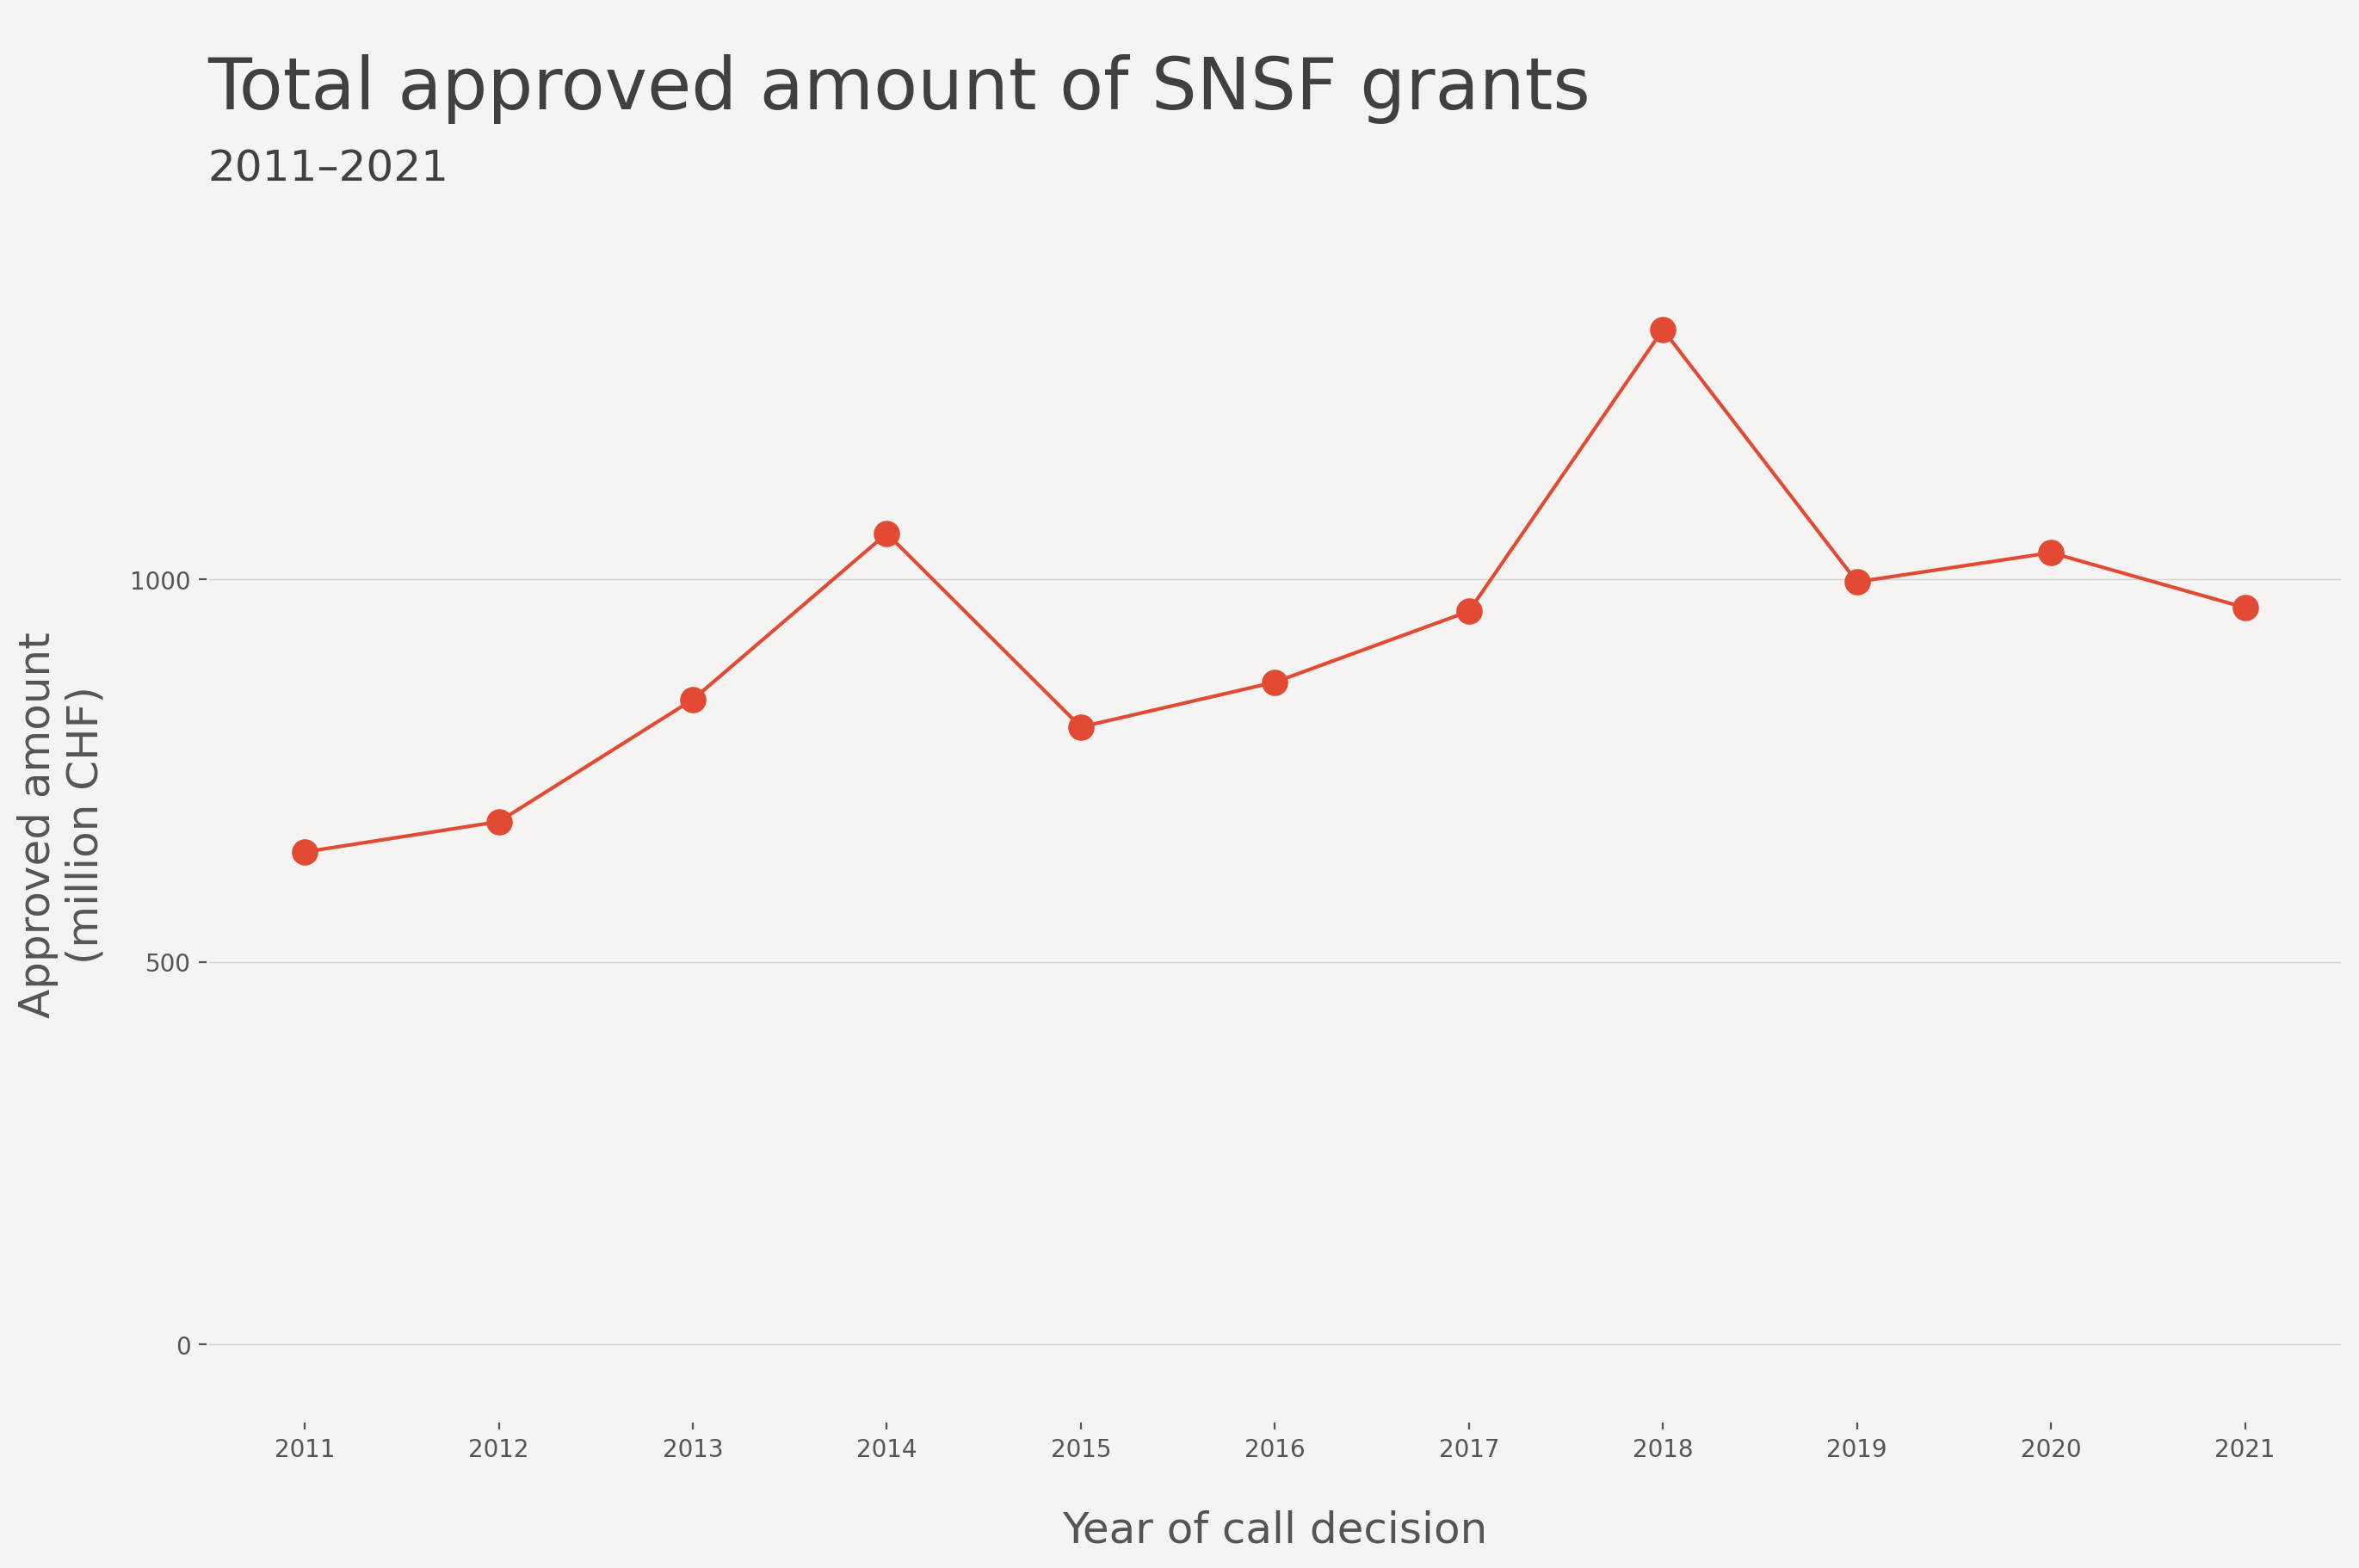

In [8]:
TITLE_SIZE = 30
TEXT_SIZE = 18

fig, ax = plt.subplots(figsize=(16,9))

total_granted.plot(ax=ax, marker="o", markersize=10)

# pad  top of graph
ax.text(x=0, y=1.15, s=" ", size=TEXT_SIZE, transform=ax.transAxes)

ax.set_title("Total approved amount of SNSF grants", loc="left", pad=50, size=TITLE_SIZE)
ax.text(x=0, y=1.04, s=f"{start_year}–{end_year}", size=TEXT_SIZE, transform=ax.transAxes)

ax.set_xlabel("Year of call decision", labelpad=20, size=TEXT_SIZE)
ax.set_ylabel("Approved amount\n(million CHF)", labelpad=10, size=TEXT_SIZE)

ax.set_xticks(total_granted.index)
ax.set_yticks([0, 500, 1000])

ax.set_ylim(-100, total_granted.max()*1.1)
ax.set_xlim(start_year-.5, end_year+.5)

ax.grid(color='lightgrey', linewidth=.5, axis="y")

plt.savefig("_output/01_total_per_year.jpg", dpi=150, bbox_inches="tight")

## Plot: Distribution of grant values
**This is an additional and somewhat more detailed plot that isn't included in SNSF's article/code.**

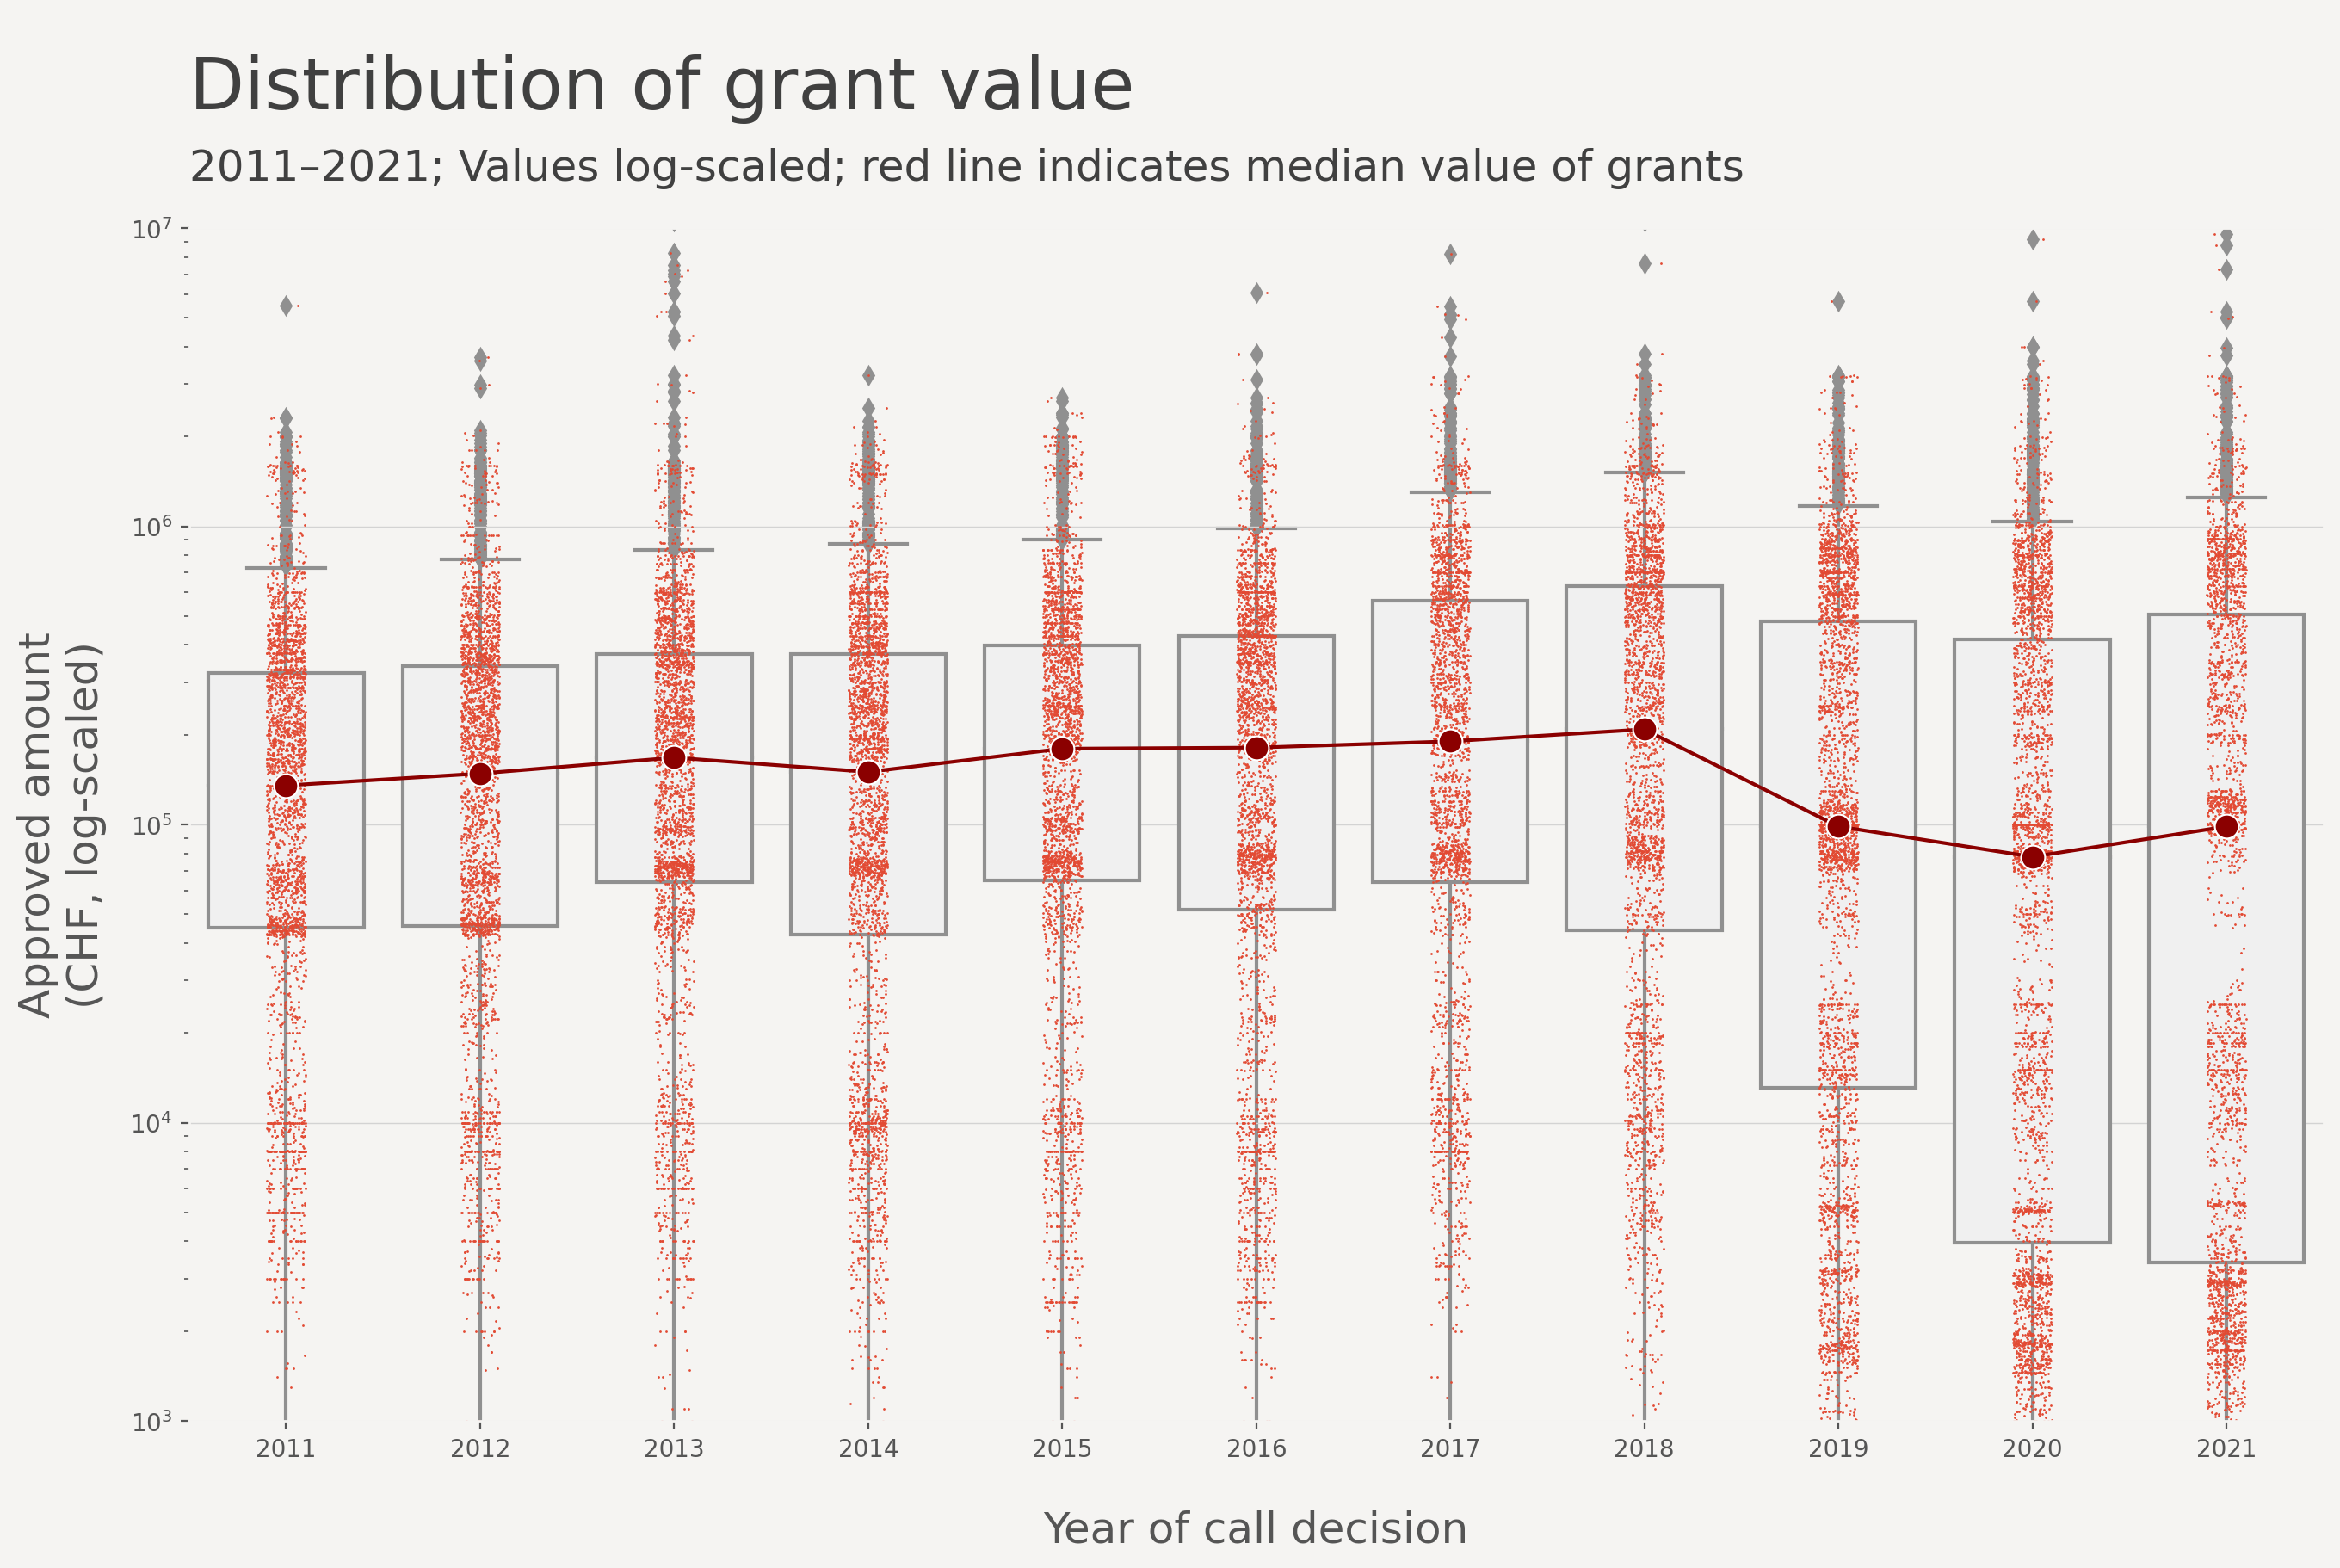

In [9]:
fig, ax = plt.subplots(figsize=(16,9))

# pad  top of graph
ax.text(x=0, y=1.15, s=" ", size=TEXT_SIZE, transform=ax.transAxes)

ax.set_title("Distribution of grant value", loc="left", pad=50, size=TITLE_SIZE)
ax.text(x=0, y=1.04, s=f"{start_year}–{end_year}; Values log-scaled; red line indicates median value of grants", size=TEXT_SIZE, transform=ax.transAxes)

sns.boxplot(df, x="CallDecisionYear", y="AmountGrantedAllSets", color="#f0f0f0", ax=ax, zorder=0)
sns.stripplot(df, x="CallDecisionYear", y="AmountGrantedAllSets", alpha=1, size=1, ax=ax, zorder=1)

tmp = df.groupby("CallDecisionYear").AmountGrantedAllSets.median().reset_index()
sns.lineplot(tmp, x=tmp.index, y="AmountGrantedAllSets", ax=ax, color="darkred", marker="o", markersize=10, zorder=2)

ax.set_xlabel("Year of call decision", labelpad=20, size=TEXT_SIZE)
ax.set_ylabel("Approved amount\n(CHF, log-scaled)", labelpad=10, size=TEXT_SIZE)

ax.semilogy(True)
ax.set_ylim(1_000, 10_000_000)
ax.grid(color='lightgrey', linewidth=.5, axis="y")

plt.savefig("_output/02_distribution_per_institution.jpg", dpi=150, bbox_inches="tight")

## Plot: Total amount by funding scheme

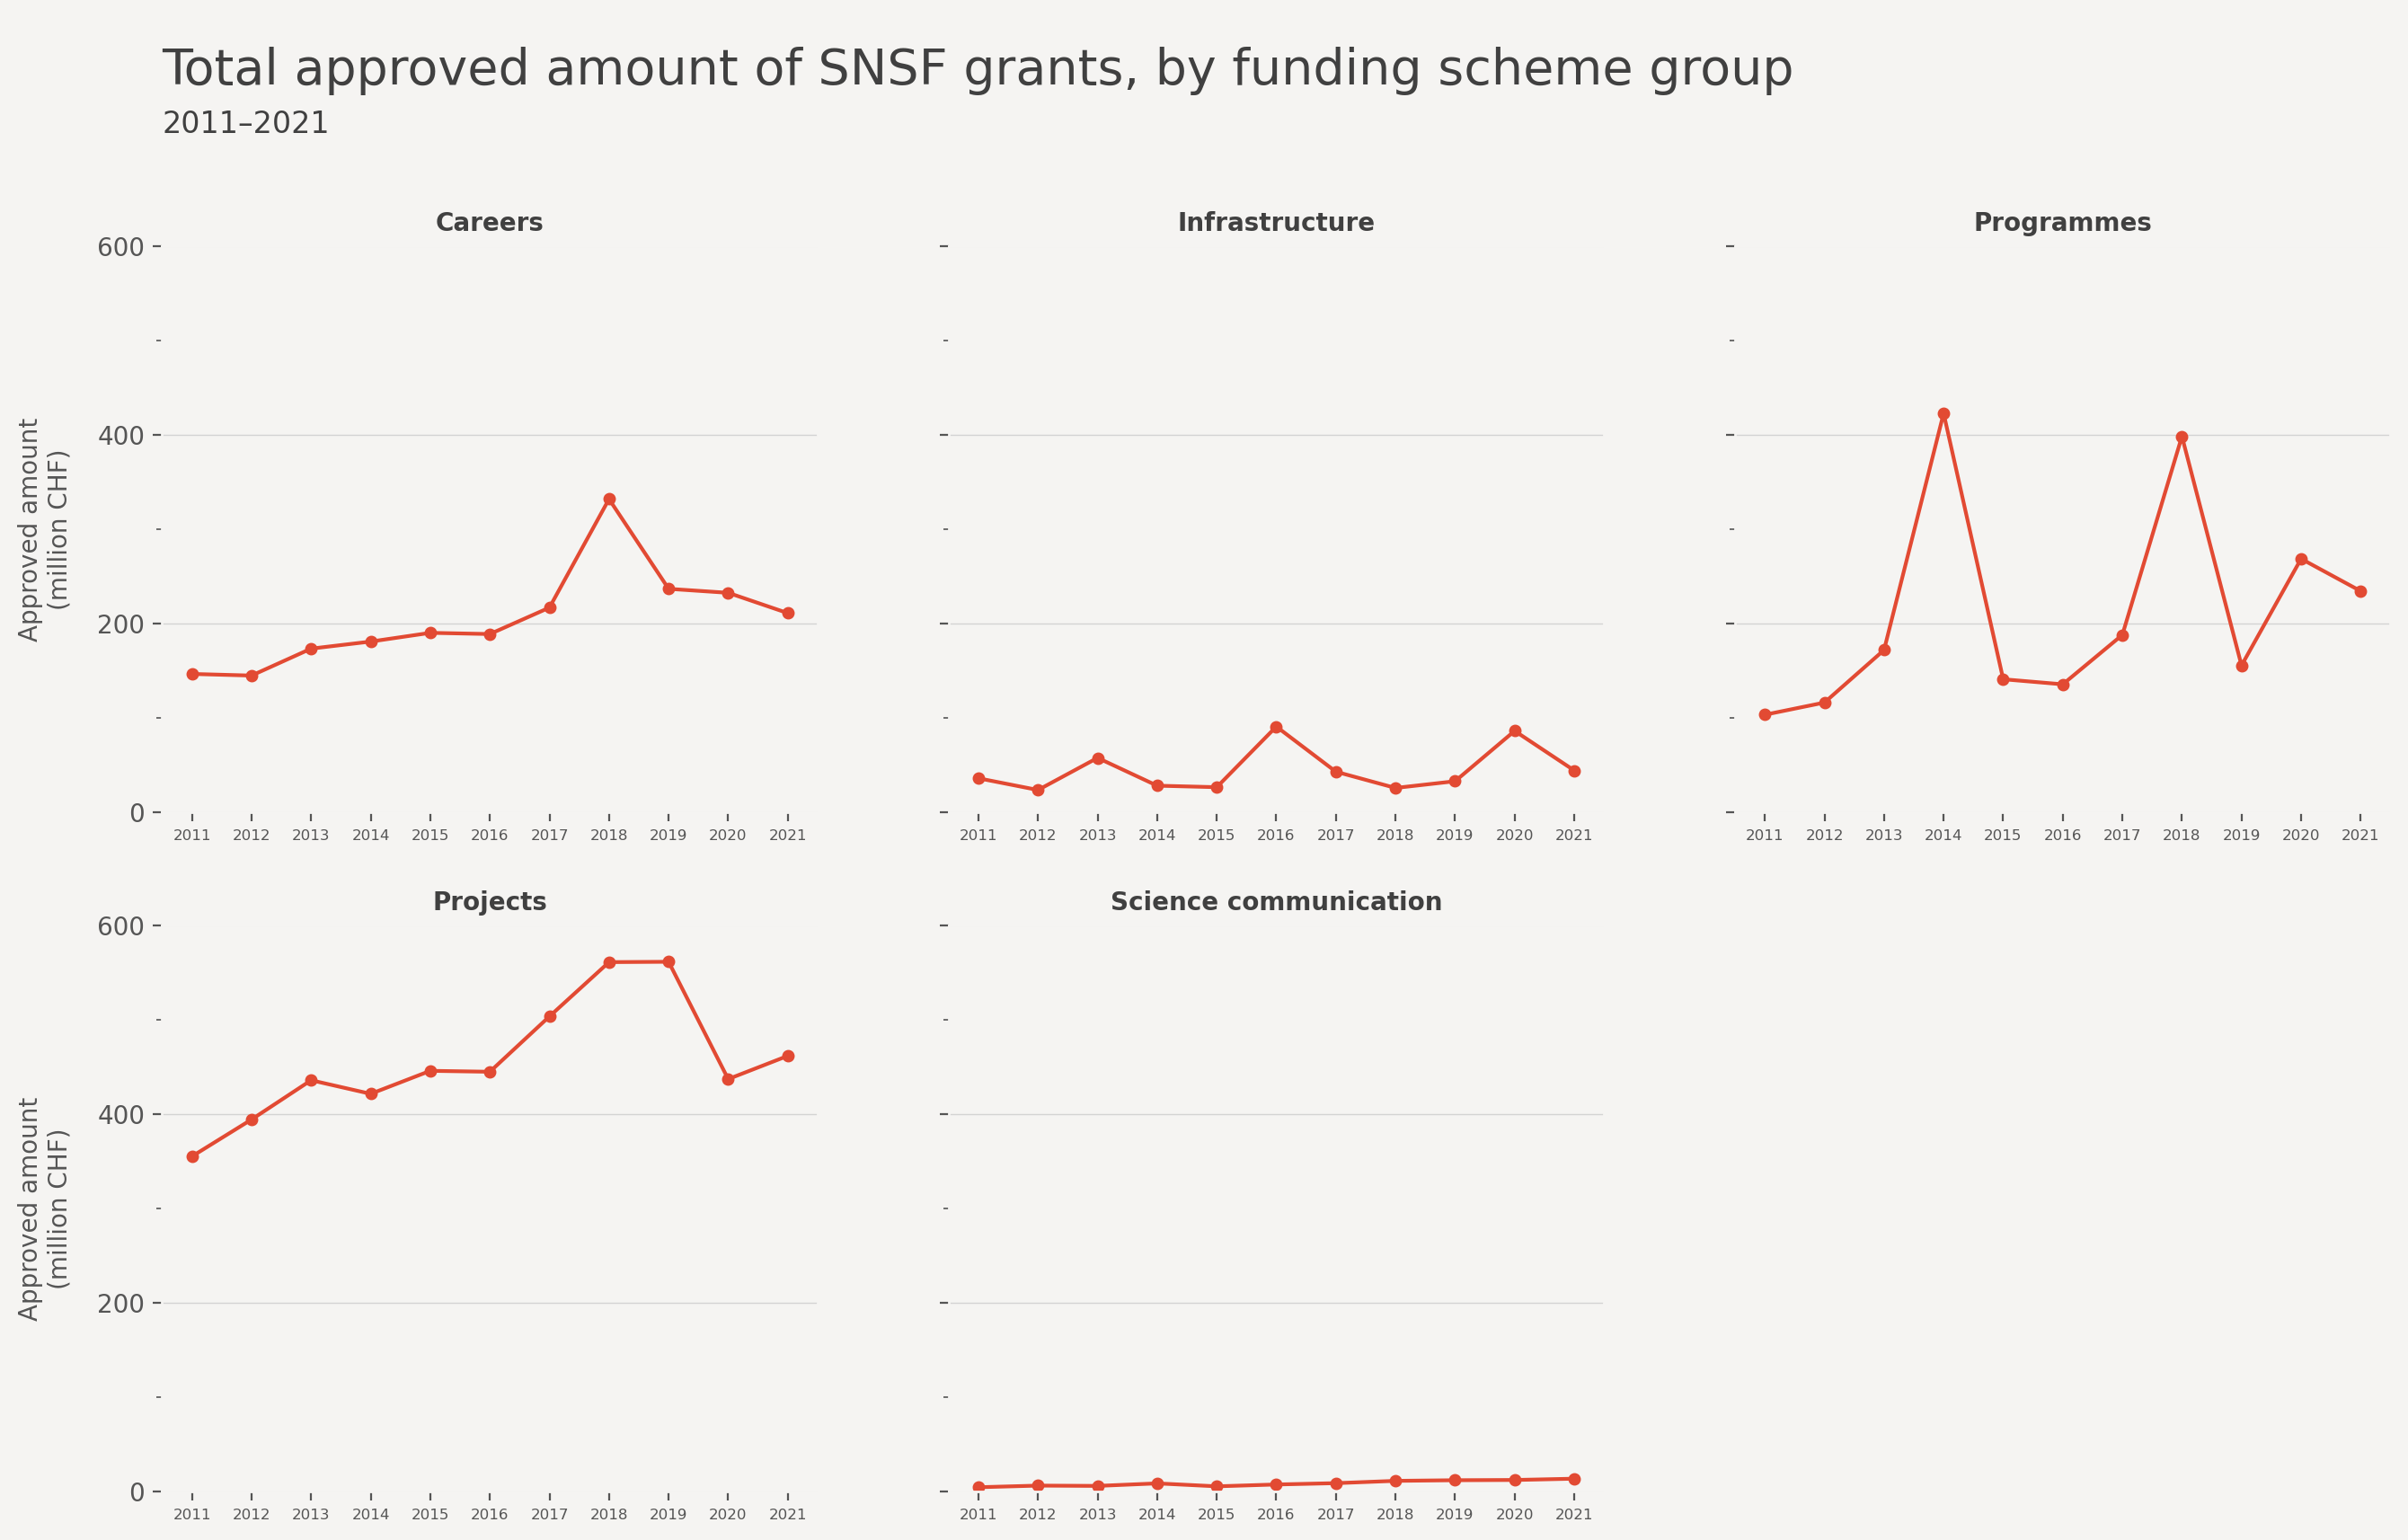

In [10]:
schemes = df.FundingInstrumentLevel1.unique()
schemes = sorted(schemes)

fig, axes = plt.subplots(figsize=(16,9), ncols=3, nrows=2, sharex=False, sharey=True)
axes = axes.ravel()

x = axes[0].get_position().x0
y = axes[0].get_position().y1

# pad  top of graph
fig.text(x=x, y=y+.12, s=" ", size=TEXT_SIZE)

fig.text(x=x, y=y+.1, s="Total approved amount of SNSF grants, by funding scheme group", size=20)
fig.text(x=x, y=y+.07, s=f"{start_year}–{end_year}", size=12)

for idx, scheme in enumerate(schemes):
    tmp = df[df.FundingInstrumentLevel1==scheme]
    total_granted = tmp.groupby("CallDecisionYear").AmountGrantedAllSets.sum() / 1_000_000
    total_granted.plot(ax=axes[idx], marker="o", markersize=4)
    
    axes[idx].set_xlabel(None)
    axes[idx].set_ylabel("Approved amount\n(million CHF)", labelpad=10, size=10)
    
    axes[idx].set_title(f"{scheme}", size=10, fontdict={"weight":"bold"})
    axes[idx].set_xticks(total_granted.index)
    axes[idx].set_xticklabels(total_granted.index, size=6)
    axes[idx].set_yticks([0, 200, 400, 600])

    axes[idx].set_ylim(0, 600)

    axes[idx].grid(color='lightgrey', linewidth=.5, axis="y")

fig.delaxes(axes[5])

plt.savefig("_output/03_total_by_scheme.jpg", dpi=120, bbox_inches="tight")

## Amount of funding by discipline

In [11]:
tmp = df[df.FundingInstrumentReporting !="Sinergia"].copy()

granted = tmp.groupby("MainDiscipline").AmountGrantedAllSets.agg(["sum", "count"])
granted.columns = ["total", "count"]
granted.total = granted.total / 1e6

total = granted.total.sum()
granted["share"] = 100 / total * granted.total
granted = granted.sort_values("total", ascending=False).head(10)

format_dict = "{:,.2f}"
display(granted.style.format({"total": '{:,.2f}', 
                              "count": '{:.0f}', 
                              "share": "{:.1f} %"}))

,total,count,share
MainDiscipline,,,
Neurophysiology and Brain Research,357.02,961,3.8 %
Molecular Biology,344.27,906,3.6 %
Condensed Matter Physics,332.91,847,3.5 %
Mathematics,282.79,850,3.0 %
Psychology,276.55,1087,2.9 %
Physical Chemistry,271.74,649,2.9 %
"Immunology, Immunopathology",261.57,644,2.8 %
Sociology,255.18,830,2.7 %
Material Sciences,249.57,604,2.6 %


## Plot: Research domains per institution

Get all institution with more than 50 projects

In [12]:
more_than = 50

tmp = df[df.FundingInstrumentLevel1=="Projects"]
tmp = tmp.groupby("ResearchInstitution").ResearchInstitution.count().sort_values(ascending=False)
inst_above_50_grants = tmp[tmp > more_than]
display(inst_above_50_grants)

ResearchInstitution
University of Zurich - ZH                                                                1570
ETH Zurich - ETHZ                                                                        1566
University of Geneva - GE                                                                1228
EPF Lausanne - EPFL                                                                      1158
University of Berne - BE                                                                 1143
University of Lausanne - LA                                                               947
University of Basel - BS                                                                  913
University of Fribourg - FR                                                               439
Paul Scherrer Institute - PSI                                                             300
Università della Svizzera italiana - USI                                                  240
University of Neuchatel - NE            

Prepare data and plot stacked bar graph.

In [13]:
tmp = df[(df.FundingInstrumentLevel1=="Projects") & (df.ResearchInstitution.isin(inst_above_50_grants.index))]
tmp_cnt = tmp.groupby(["ResearchInstitution", "MainDiscipline_Level1"]).AmountGrantedAllSets.count()
tmp_total = tmp_cnt.groupby("ResearchInstitution").sum()
tmp = pd.merge(tmp_cnt, tmp_total, left_index=True, right_index=True)
tmp = 100 / tmp.AmountGrantedAllSets_y  * tmp.AmountGrantedAllSets_x
tmp = tmp.unstack().reset_index()
tmp["abbr"] = tmp.ResearchInstitution.apply(lambda x: x.split(" - ")[-1])
tmp = tmp.sort_values("abbr", ascending=False)
tmp.set_index("abbr", inplace=True)

In [14]:
cols = ['ResearchInstitution', 'Humanities and Social Sciences', 
        'Mathematics, Natural- and Engineering Sciences',
        'Biology and Medicine']
tmp = tmp[cols]

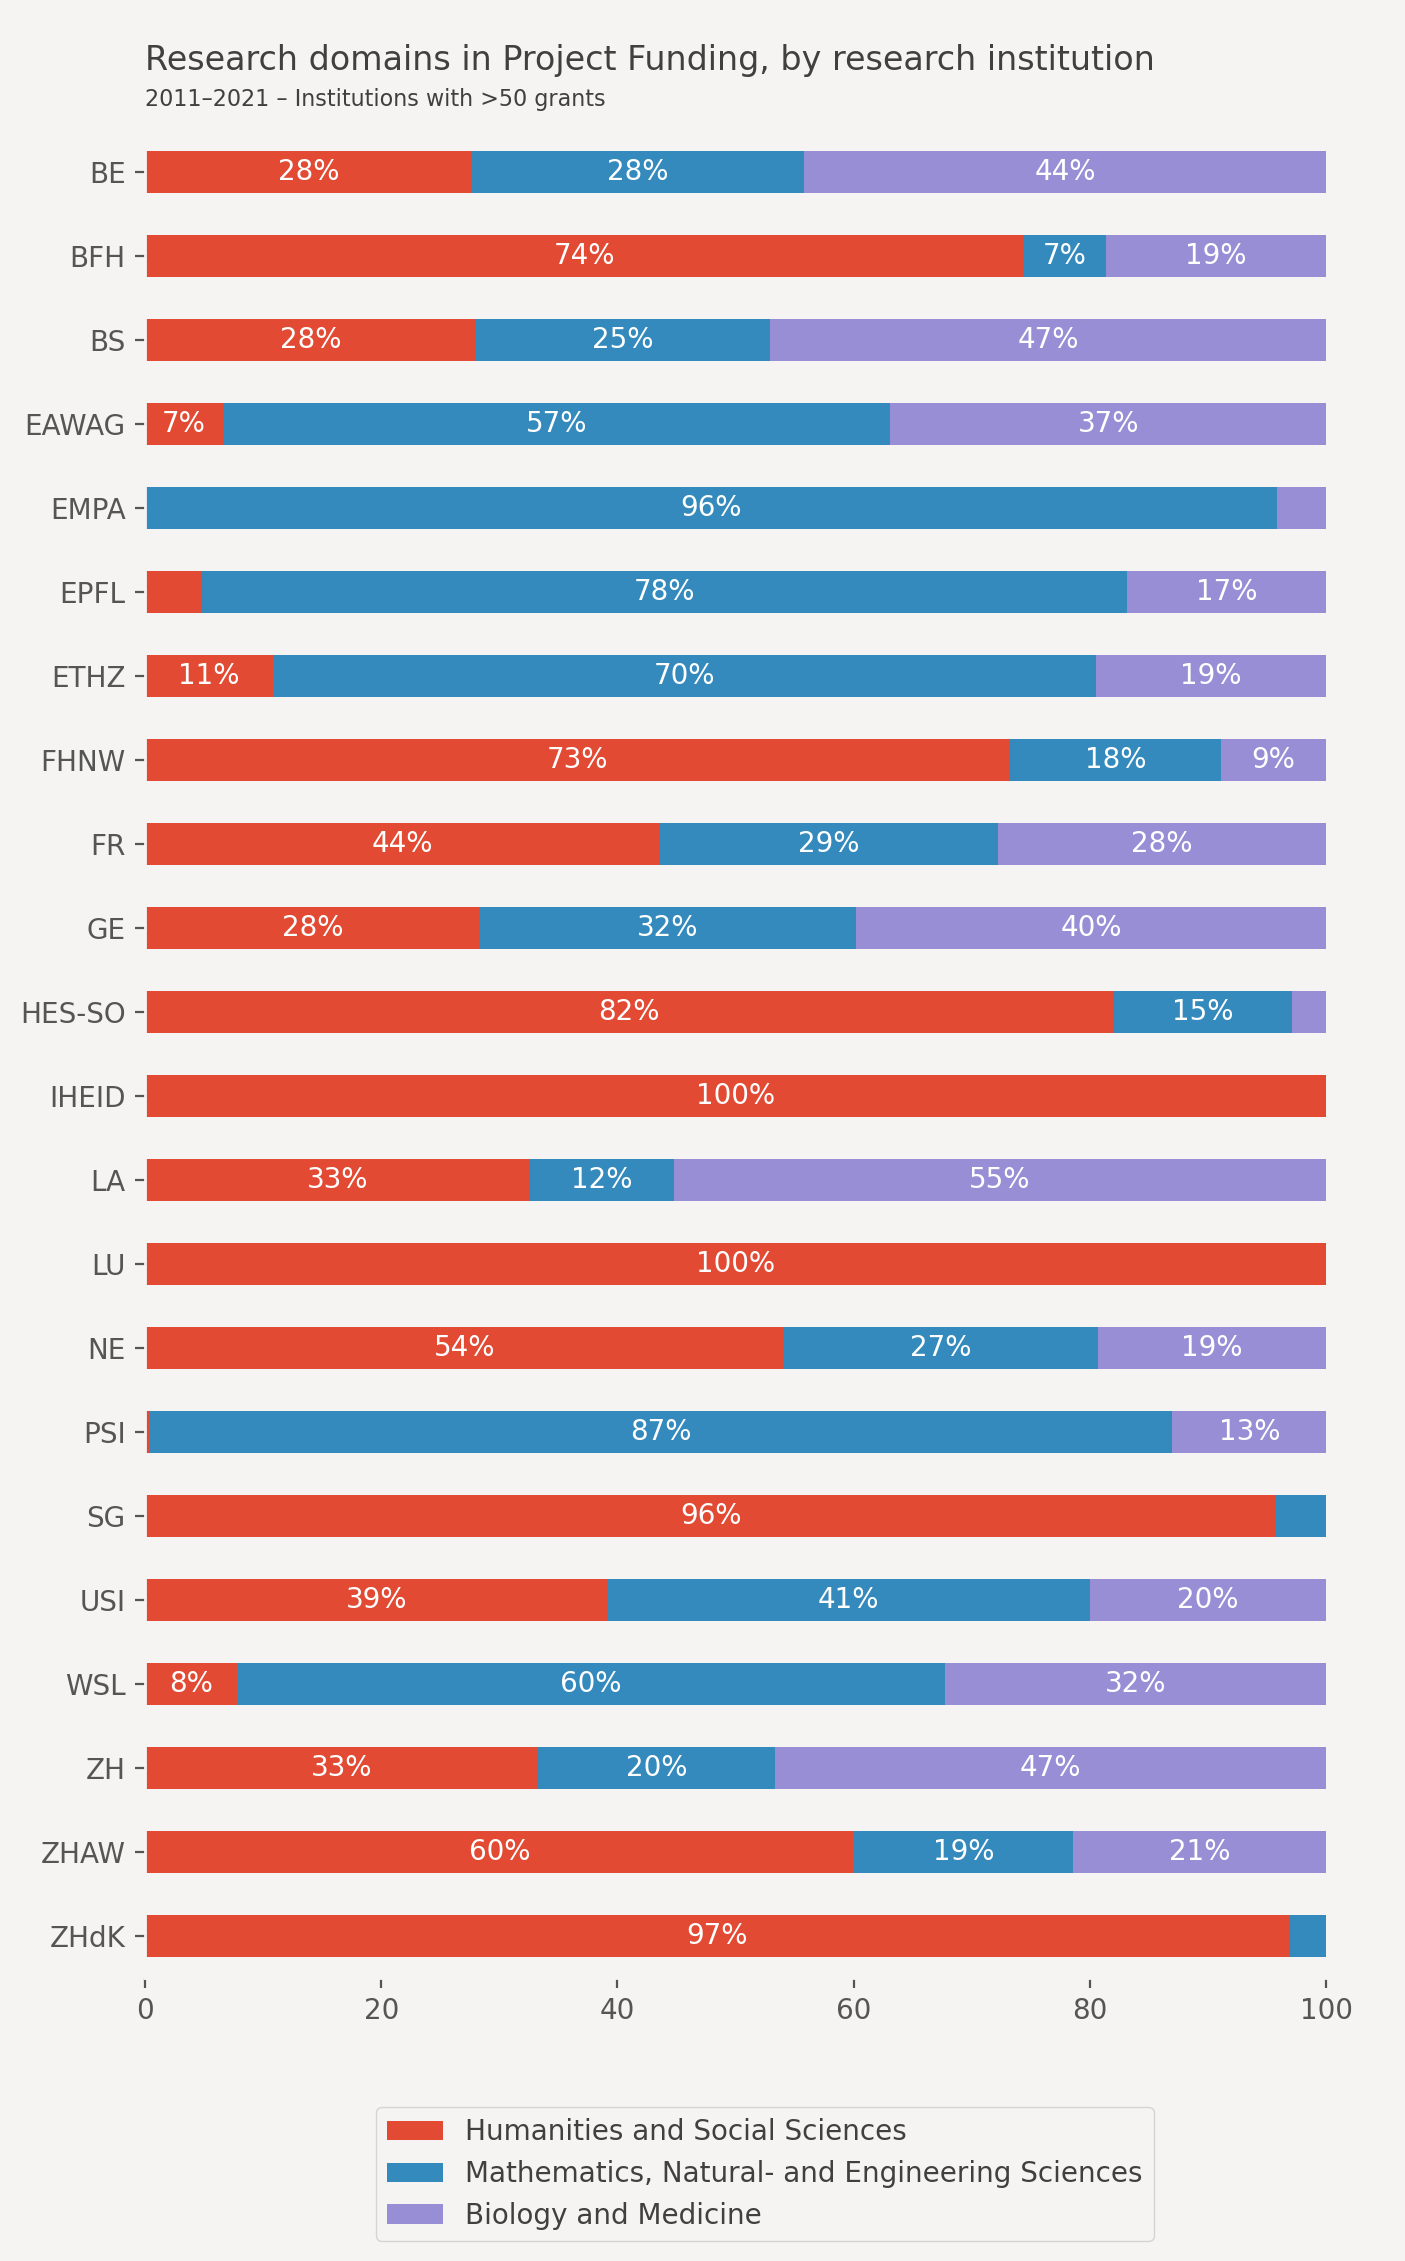

In [15]:
fig, ax = plt.subplots(figsize=(8,12))

x = ax.get_position().x0
y = ax.get_position().y1

# pad  top of graph
fig.text(x=x, y=y+.03, s=" ", size=TEXT_SIZE)

fig.text(x=x, y=y+.025, s="Research domains in Project Funding, by research institution", size=12)
fig.text(x=x, y=y+.01, s=f"{start_year}–{end_year} – Institutions with >50 grants", size=8)

tmp.plot.barh(stacked=True, ax=ax)

# https://stackoverflow.com/questions/70110369/how-to-make-a-horizontal-stacked-bar-plot-of-values-as-percentage
for p in ax.patches:
    h, w, x, y = p.get_height(), p.get_width(), p.get_x(), p.get_y()
    text = f'{w:.0f}%'
    if w > 5:
        ax.annotate(text=text, xy=(x + w / 2, y + h / 2), ha='center', va='center', color='white', size=10)

ax.set_ylabel(None)
plt.legend(bbox_to_anchor=(0.5, -.15), loc="lower center")
plt.savefig("_output/04_research_domains.jpg", dpi=120, bbox_inches="tight")

<sub>Patrick Arnecke, 2022<sub>